In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
#Orginal Dataset

suicide= pd.read_csv('Dataset/suicide.csv')

In [3]:
#Creating a copy for the dataset for working on the same without affecting the original dataset

df=suicide

In [4]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
#Describe function includes analysis of all our numerical data. 
# For this, count, mean, std, min,% 25,% 50,% 75, max values are given.

df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [6]:
#The info function shows the data types and numerical values of the features in our data set.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [7]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [8]:
#so,change the names of the column. Because there may be problems for future analysis.
df=df.rename(columns={'country':'Country','year':'Year','sex':'Gender','age':'Age','suicides_no':'SuicidesNo','population':'Population','suicides/100k pop':'Suicides100kPop','country-year':'CountryYear','HDI for year':'HDIForYear',' gdp_for_year ($) ':'GdpForYearMoney','gdp_per_capita ($)':'GdpPerCapitalMoney','generation':'Generation'})

In [9]:
df.columns

Index(['Country', 'Year', 'Gender', 'Age', 'SuicidesNo', 'Population',
       'Suicides100kPop', 'CountryYear', 'HDIForYear', 'GdpForYearMoney',
       'GdpPerCapitalMoney', 'Generation'],
      dtype='object')

In [10]:
df.isnull().sum()

Country                   0
Year                      0
Gender                    0
Age                       0
SuicidesNo                0
Population                0
Suicides100kPop           0
CountryYear               0
HDIForYear            19456
GdpForYearMoney           0
GdpPerCapitalMoney        0
Generation                0
dtype: int64

In [11]:
df['HDIForYear'].isnull().sum()/len(df)

0.699352983465133

In [12]:
#removing HDIForYear for having 70% of total data as Null Data

df = df.drop(['HDIForYear'], axis = 1)

In [13]:
#Checking the duplitcate and creating a dataset for the duplicated files
duplicate = df[df.duplicated()]
duplicate

,Country,Year,Gender,Age,SuicidesNo,Population,Suicides100kPop,CountryYear,GdpForYearMoney,GdpPerCapitalMoney,Generation


#### There is no deplicate value in the dataset

In [14]:
df.columns

Index(['Country', 'Year', 'Gender', 'Age', 'SuicidesNo', 'Population',
       'Suicides100kPop', 'CountryYear', 'GdpForYearMoney',
       'GdpPerCapitalMoney', 'Generation'],
      dtype='object')

<Figure size 720x1800 with 0 Axes>

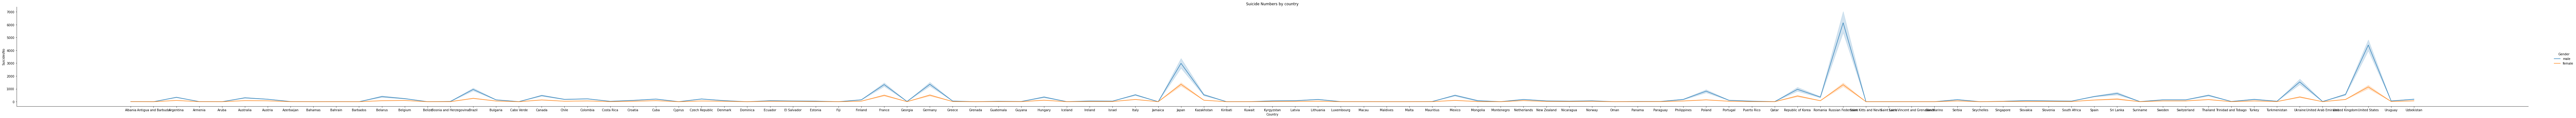

In [15]:
#A Relplot showing the range of suicides in different countries.

plt.figure(figsize=(10,25))
sns.relplot(y = 'SuicidesNo', x = 'Country', data=df, hue='Gender', aspect =23,height=5, kind='line')
plt.title('Suicide Numbers by country')
plt.show()

#### As per the aboove graph the countries with most number of suicides is lead by Russian Federation and USA.
It is closely followed by Japan and Ukraine.
Also, it is noticed that both genders possess the tendency of suicides in these countries although the number of females is lower due to the lower female population.

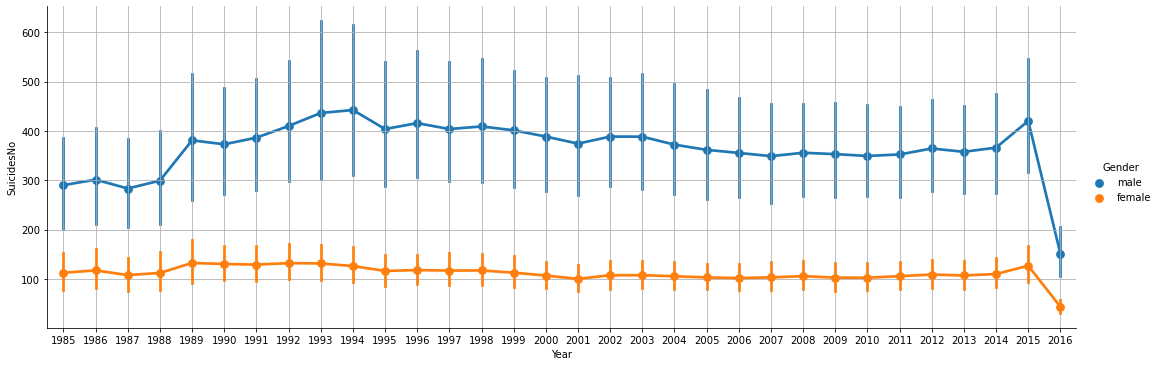

In [16]:
# Graph showing the tendency of Suicides over the year.

sns.catplot(data = df, x='Year', y = 'SuicidesNo',hue = 'Gender', aspect = 3,kind='point')
plt.grid() #for grid lines on a plot

#### As the above graph picturises the scenario of Suicides over the past few years. 2016 has very less data so that is not depiciting the actual picture.
We can clearly see the rate of suicide for Male has started to increase in 1989 and till now it has been very stagnant at that point.
We have noticed a sudden increase in 2015 as well which is much higher than the usual numbers and this increase is seen in both genders.

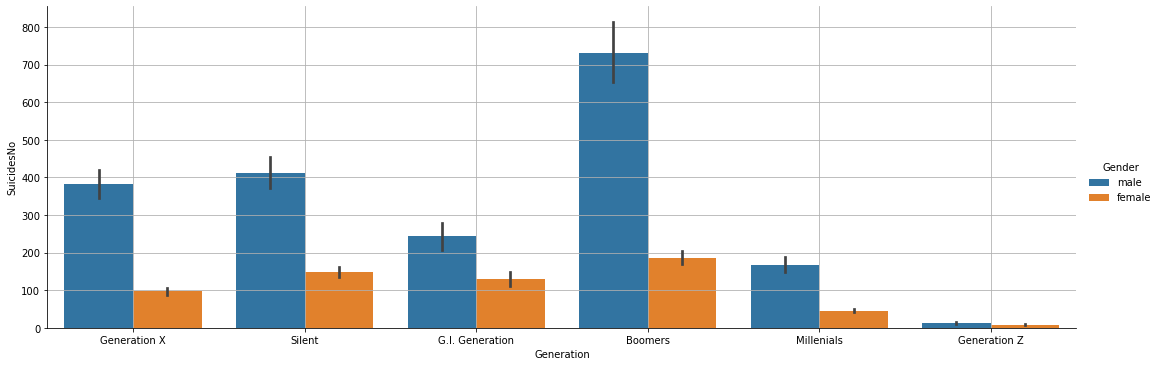

In [17]:
# Graph showing the tendency of Suicides for various generations.

sns.catplot(data = df, x='Generation', y = 'SuicidesNo',hue = 'Gender', aspect = 3,kind='bar')
plt.grid() #for grid lines on a plot

#### As noticeable in the above graph the tendency of suicides in clearly very high for "Boomer" Generation.
The Genration Z holds the lowest suicides. 
There can be measures taken by the governments to hold up the Boomer Generation as they are more affected by the Depression or what ever reasons which are leading them towards the decision of Suicide.
Boomer is closely followed by "Silent" and "X" Generation.

<Figure size 720x1800 with 0 Axes>

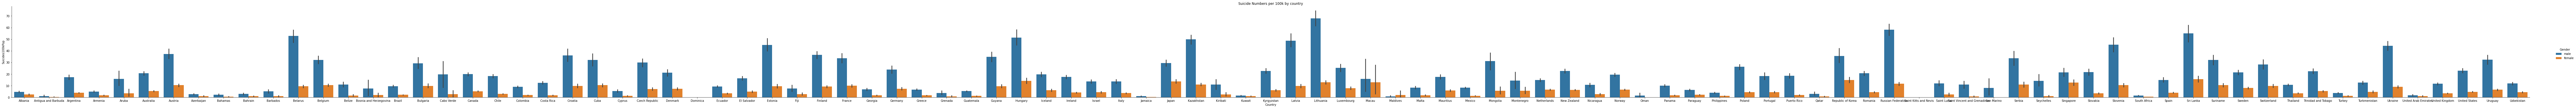

In [18]:
#Plotting the graphn showing the per 100k suicide rate for various countries

plt.figure(figsize=(10,25))
sns.catplot(y = 'Suicides100kPop', x = 'Country', data=df, hue='Gender', aspect =25,height=5, kind='bar')
plt.title('Suicide Numbers per 100k by country')
plt.show()

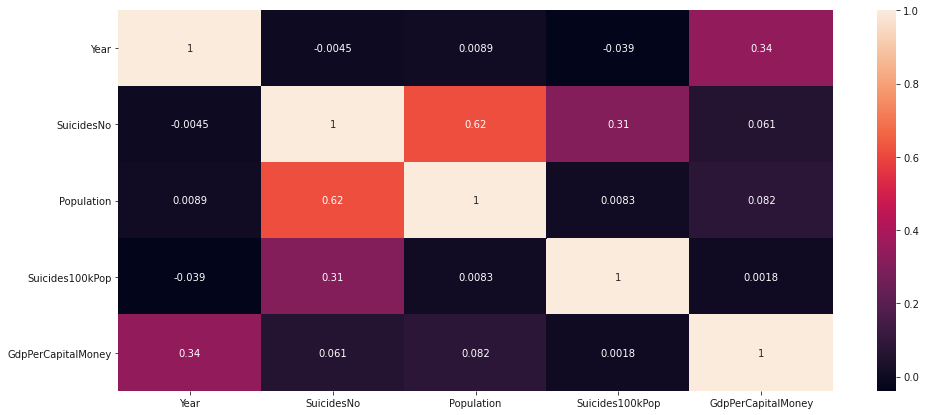

In [26]:
#Let's check if there is any correlation between these numeric variables

### Set figure size
plt.figure(figsize=(16,7))
cor = sns.heatmap(df.corr(), annot = True)

Text(0.5, 1.0, 'Number of suicides by Age')

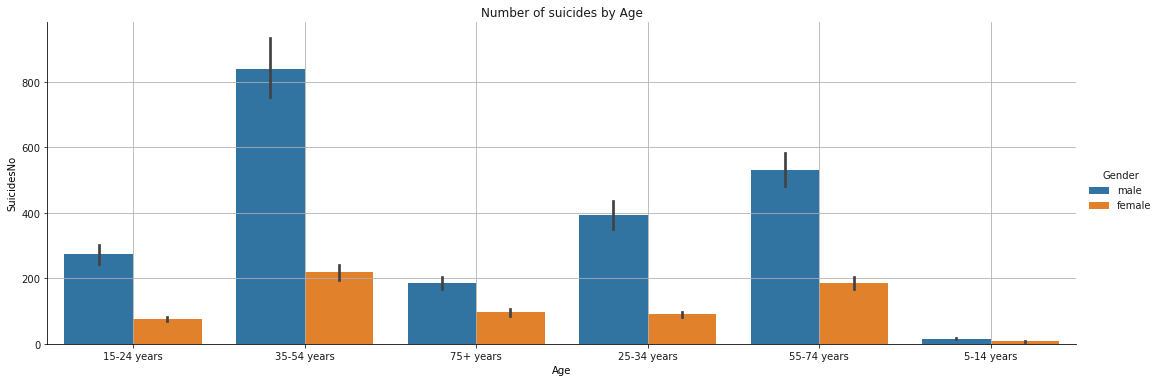

In [27]:
# Graph showing the tendency of Suicides for different ages.

sns.catplot(data = df, x='Age', y = 'SuicidesNo',hue = 'Gender', aspect = 3,kind='bar')
plt.grid() #for grid lines on a plot
plt.title("Number of suicides by Age")

#### As per the above observation there is a high tendency of suicide between the age of 34-54 Years. This is the mid life and most important family and career movements are very less arounf this age group.
The tendency again seems to increase around 55-74 Years. This is around the age when the retirement is near. People usually will need pension or savings to spend the rest of the life. There is a bery less chance of joining a job around this age or any career changes as well.

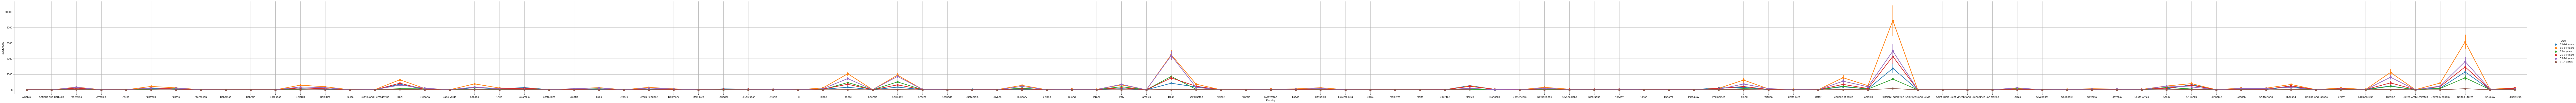

In [34]:
# Graph showing the tendency of Suicides for various ages in all the countries.

sns.catplot(data = df, y='SuicidesNo', x = 'Country',hue = 'Age', aspect = 25, height = 6,kind='point')
plt.grid() #for grid lines on a plot